In [30]:
#importar df_sin_anomalias
import pandas as pd
import numpy as np

df_sin_anomalos= pd.read_csv('df_sin_anomalos.csv')
df_sin_anomalos.head()

,BETABLOQUEANTES,ASPIRINA,OTROS_ANTIAGREGANTES,VERAPAMILO,DILTIAZEM,DIGOXINA,OTROS_ANTIARRITMICOS,SOTALOL,IMC,N_PASTILLAS_D_INICIO,...,CUALQUIER_ANTIAGREGANTE,DOBLE_ANTIAGREGACION,SAME-TT2R2_MAS3,N_COMEDICACIONES,ICTUS/EMBOLIA,ENFERMEDAD_VASCULAR,DISFUNCION/DILATACION,SAME_MAS_DE_2,ALTERACION,BLOQUEO_CALCIO
0,0,0,0,0,0,0,0,0,37.49,5,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,29.30,16,...,1,1,0,1,0,1,1,1,0,0
2,1,1,0,0,0,0,0,0,35.00,14,...,1,0,0,1,0,0,1,0,0,0
3,1,0,0,0,0,0,0,0,25.00,13,...,0,0,0,2,1,0,1,1,0,0
4,0,0,0,0,0,0,0,0,44.00,8,...,0,0,1,0,0,0,1,0,0,0


In [316]:
# SAME-TT2R2 value counts
df_sin_anomalos['SAME-TT2R2'].value_counts()

1    290
2    242
3    193
0    162
4     99
5     14
Name: SAME-TT2R2, dtype: int64

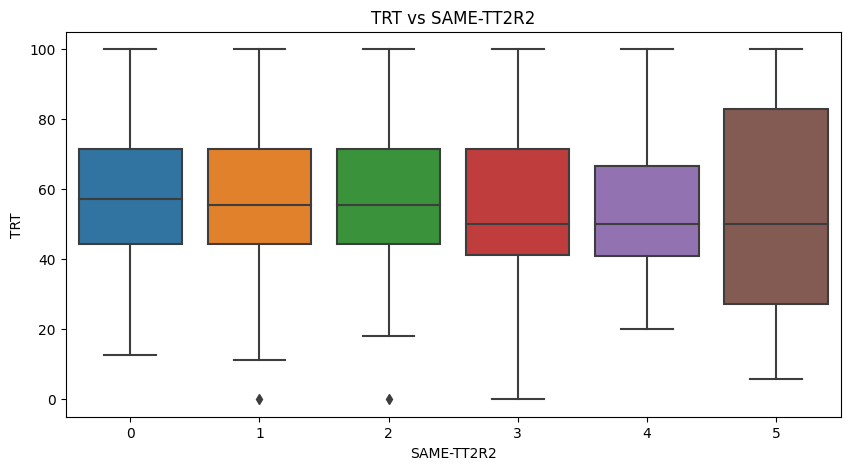

In [31]:
# boxplot de TRT_6MESES_SIN_1_MES y SAME-TT2R2
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.boxplot(y='TRT_6MESES_SIN_1_MES', x='SAME-TT2R2', data=df_sin_anomalos)
# y labeñ
plt.ylabel('TRT')
# title
plt.title('TRT vs SAME-TT2R2')
plt.show()

### SAME-TT2R2 vs TRT_6MESES_SIN_1_MES

In [347]:
# test de normalidad de TRT_6MESES_SIN_1_MES cuando SAME-TT2R2 es 0, 1, 2,3,4 y 5
from scipy.stats import shapiro

for i in range(6):
    print('SAME-TT2R2 =', i)
    print(shapiro(df_sin_anomalos[df_sin_anomalos['SAME-TT2R2']==i]['TRT_6MESES_SIN_1_MES']))
    print()

# si p-value < 0.05, no es normal
# si p-value > 0.05, es normal


SAME-TT2R2 = 0
ShapiroResult(statistic=0.9795090556144714, pvalue=0.0107024647295475)

SAME-TT2R2 = 1
ShapiroResult(statistic=0.9861664175987244, pvalue=0.003682483918964863)

SAME-TT2R2 = 2
ShapiroResult(statistic=0.9792227745056152, pvalue=0.0021424083970487118)

SAME-TT2R2 = 3
ShapiroResult(statistic=0.9750783443450928, pvalue=0.001503923092968762)

SAME-TT2R2 = 4
ShapiroResult(statistic=0.975027859210968, pvalue=0.10166825354099274)

SAME-TT2R2 = 5


ValueError: Data must be at least length 3.

In [348]:
# shapiro de TRT_6MESES_SIN_1_MES con SAME-TT2R2
print(shapiro(df_sin_anomalos['SAME-TT2R2']))


ShapiroResult(statistic=0.9026875495910645, pvalue=1.0396772578837695e-24)


In [349]:
# test de normalidad y homogeneidad para comparar las medias de SAME-TT2R2
from scipy.stats import shapiro
from scipy.stats import levene

# test de homogeneidad
stat, p = levene(df_sin_anomalos['TRT_6MESES_SIN_1_MES'][df_sin_anomalos['SAME-TT2R2'] == 0],
                 df_sin_anomalos['TRT_6MESES_SIN_1_MES'][df_sin_anomalos['SAME-TT2R2'] == 1],
                 df_sin_anomalos['TRT_6MESES_SIN_1_MES'][df_sin_anomalos['SAME-TT2R2'] == 2],
                 df_sin_anomalos['TRT_6MESES_SIN_1_MES'][df_sin_anomalos['SAME-TT2R2'] == 3],
                 df_sin_anomalos['TRT_6MESES_SIN_1_MES'][df_sin_anomalos['SAME-TT2R2'] == 4],
                 df_sin_anomalos['TRT_6MESES_SIN_1_MES'][df_sin_anomalos['SAME-TT2R2'] == 5])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('No se rechaza H0, las varianzas son iguales')
else:
    print('Se rechaza H0, las varianzas no son iguales')

stat=nan, p=nan
Se rechaza H0, las varianzas no son iguales


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [350]:
# test de kruskal wallis para TRT_6MESES_SIN_1_MES para variables categoricas con mas de dos valores unicos
from scipy.stats import kruskal

# test de kruskal wallis
print(kruskal(*[group["TRT_6MESES_SIN_1_MES"].values for name, group in df_sin_anomalos.groupby('SAME-TT2R2')]))


KruskalResult(statistic=3.191888902777199, pvalue=0.5262420239205713)


In [187]:
# describe() de TRT_6MESES_SIN_1_MES para SAME-TT2R2
df_sin_anomalos.groupby('SAME-TT2R2')['TRT_6MESES_SIN_1_MES'].describe()

,count,mean,std,min,25%,50%,75%,max
SAME-TT2R2,,,,,,,,
0,162.0,58.576543,19.354601,12.5,44.40,57.1,71.400,100.0
1,290.0,57.051379,18.526155,0.0,44.40,55.6,71.400,100.0
2,242.0,58.407025,19.077951,0.0,44.40,55.6,71.400,100.0
3,193.0,55.851295,20.420224,0.0,41.20,50.0,71.400,100.0
4,99.0,53.800000,19.800170,20.0,40.85,50.0,66.700,100.0
5,14.0,54.264286,29.966458,5.9,27.30,50.0,83.025,100.0


### SAME-TT2R2_MAS2 vs TRT_6MESES_SIN_1_MES

In [188]:
# dividir same en (0,1 = 0) y (2,3,4,5 = 1)
df_sin_anomalos['SAME-TT2R2_MAS2'] = 0
df_sin_anomalos.loc[df_sin_anomalos['SAME-TT2R2'] > 1, 'SAME-TT2R2_MAS2'] = 1
df_sin_anomalos['SAME-TT2R2_MAS2'].value_counts()

1    548
0    452
Name: SAME-TT2R2_MAS2, dtype: int64

In [189]:
# test de normalidad para TRT_6MESES_SIN_1_MES cuando SAME-TT2R2_MAS2 es 0 y 1 y decir si son normales o no
from scipy.stats import shapiro

for i in range(2):
    print('SAME-TT2R2_MAS2 =', i)
    print(shapiro(df_sin_anomalos[df_sin_anomalos['SAME-TT2R2_MAS2']==i]['TRT_6MESES_SIN_1_MES']))
    print()

SAME-TT2R2_MAS2 = 0
ShapiroResult(statistic=0.9855981469154358, pvalue=0.00018657704640645534)

SAME-TT2R2_MAS2 = 1
ShapiroResult(statistic=0.9798827767372131, pvalue=7.366673457909201e-07)



In [190]:
# test de homocedasticidad
stat, p = levene(df_sin_anomalos['TRT_6MESES_SIN_1_MES'][df_sin_anomalos['SAME-TT2R2_MAS2'] == 0],
                df_sin_anomalos['TRT_6MESES_SIN_1_MES'][df_sin_anomalos['SAME-TT2R2_MAS2'] == 1])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('No se rechaza H0, las varianzas son iguales')
else:
    print('Se rechaza H0, las varianzas no son iguales')

stat=1.983, p=0.159
No se rechaza H0, las varianzas son iguales


In [191]:
# mann whitney para comparar las medias de SAME-TT2R2_2
from scipy.stats import mannwhitneyu

stat, p = mannwhitneyu(df_sin_anomalos['TRT_6MESES_SIN_1_MES'][df_sin_anomalos['SAME-TT2R2_MAS2'] == 0],
                        df_sin_anomalos['TRT_6MESES_SIN_1_MES'][df_sin_anomalos['SAME-TT2R2_MAS2'] == 1])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('No se rechaza H0, las medianas son iguales')
else:
    print('Se rechaza H0, las medianas no son iguales')

stat=128473.500, p=0.308
No se rechaza H0, las medianas son iguales


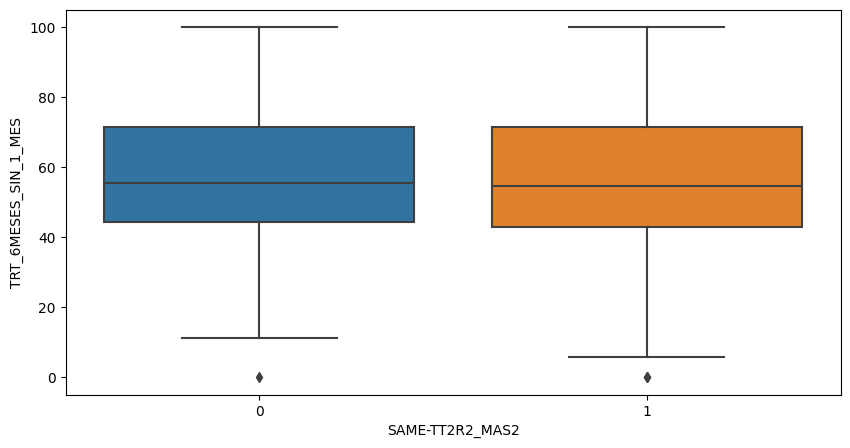

In [192]:
# boxplot de TRT_6MESES_SIN_1_MES y SAME-TT2R2_2
plt.figure(figsize=(10,5))
sns.boxplot(y='TRT_6MESES_SIN_1_MES', x='SAME-TT2R2_MAS2', data=df_sin_anomalos)
plt.show()

In [193]:
df_sin_anomalos.groupby('SAME-TT2R2_MAS2')['TRT_6MESES_SIN_1_MES'].describe()

,count,mean,std,min,25%,50%,75%,max
SAME-TT2R2_MAS2,,,,,,,,
0,452.0,57.598009,18.820107,0.0,44.4,55.6,71.4,100.0
1,548.0,56.568796,20.037551,0.0,42.9,54.5,71.4,100.0


### SAME-TT2R2_MAS3 vs TRT_6MESES_SIN_1_MES

In [194]:
#dividir same en (0,1,2 = 0) y (3,4,5 = 1)
df_sin_anomalos['SAME-TT2R2_MAS3'] = 0
df_sin_anomalos.loc[df_sin_anomalos['SAME-TT2R2'] > 2, 'SAME-TT2R2_MAS3'] = 1
df_sin_anomalos['SAME-TT2R2_MAS3'].value_counts()

0    694
1    306
Name: SAME-TT2R2_MAS3, dtype: int64

In [195]:
for i in range(2):
    print('SAME-TT2R2_MAS3 =', i)
    print(shapiro(df_sin_anomalos[df_sin_anomalos['SAME-TT2R2_MAS3']==i]['TRT_6MESES_SIN_1_MES']))
    print()

SAME-TT2R2_MAS3 = 0
ShapiroResult(statistic=0.9843886494636536, pvalue=9.315651254837576e-07)

SAME-TT2R2_MAS3 = 1
ShapiroResult(statistic=0.9762479066848755, pvalue=5.883157791686244e-05)



In [196]:
# test de homocedasticidad
stat, p = levene(df_sin_anomalos['TRT_6MESES_SIN_1_MES'][df_sin_anomalos['SAME-TT2R2_MAS3'] == 0],
                df_sin_anomalos['TRT_6MESES_SIN_1_MES'][df_sin_anomalos['SAME-TT2R2_MAS3'] == 1])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('No se rechaza H0, las varianzas son iguales')
else:
    print('Se rechaza H0, las varianzas no son iguales')

stat=2.416, p=0.120
No se rechaza H0, las varianzas son iguales


In [197]:
# test de mann whitney para comparar las medianas de SAME-TT2R2_3

stat, p = mannwhitneyu(df_sin_anomalos['TRT_6MESES_SIN_1_MES'][df_sin_anomalos['SAME-TT2R2_MAS3'] == 0],
                        df_sin_anomalos['TRT_6MESES_SIN_1_MES'][df_sin_anomalos['SAME-TT2R2_MAS3'] == 1])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('No se rechaza H0, las medianas son iguales')
else:
    print('Se rechaza H0, las medianas no son iguales')

stat=115827.000, p=0.022
Se rechaza H0, las medianas no son iguales


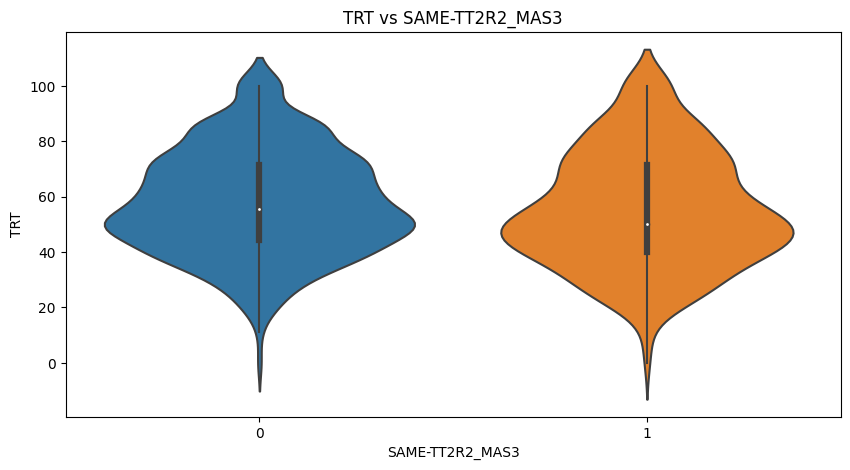

In [309]:
# violines de TRT_6MESES_SIN_1_MES y SAME-TT2R2_3
plt.figure(figsize=(10,5))
sns.violinplot(y='TRT_6MESES_SIN_1_MES', x='SAME-TT2R2_MAS3', data=df_sin_anomalos)
# cambiar nombre de los ejes
plt.ylabel('TRT')
# titulo
plt.title('TRT vs SAME-TT2R2_MAS3')
plt.show()

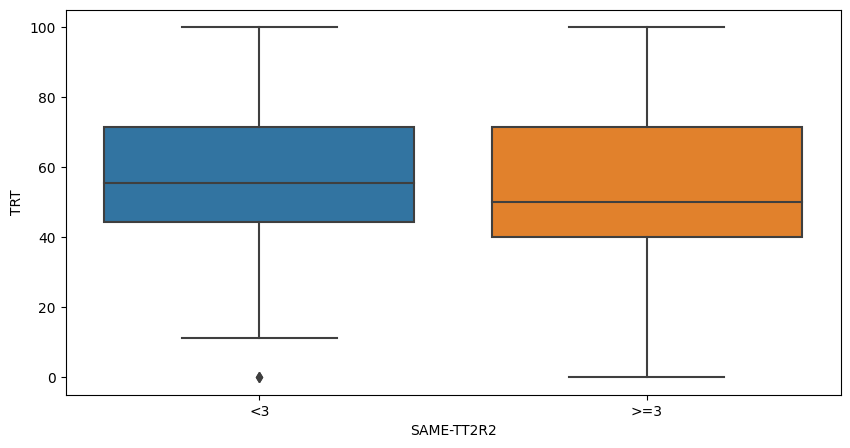

In [198]:
plt.figure(figsize=(10,5))
sns.boxplot(y='TRT_6MESES_SIN_1_MES', x='SAME-TT2R2_MAS3', data=df_sin_anomalos)
# cambiar los labels del eje x
plt.xticks([0,1], ['<3', '>=3'])
#cambia el titulo del eje x
plt.xlabel('SAME-TT2R2')
plt.ylabel("TRT")
plt.show()

In [199]:
df_sin_anomalos.groupby('SAME-TT2R2_MAS3')['TRT_6MESES_SIN_1_MES'].describe()

,count,mean,std,min,25%,50%,75%,max
SAME-TT2R2_MAS3,,,,,,,,
0,694.0,57.880115,18.900594,0.0,44.4,55.6,71.4,100.0
1,306.0,55.115033,20.680363,0.0,40.0,50.0,71.4,100.0


### SAME-TT2R2_MAS4 vs TRT_6MESES_SIN_1_MES

In [200]:
# dividir same en (0,1,2,3 = 0) y (4,5 = 1)
df_sin_anomalos['SAME-TT2R2_MAS4'] = 0
df_sin_anomalos.loc[df_sin_anomalos['SAME-TT2R2'] > 3, 'SAME-TT2R2_MAS4'] = 1

for i in range(2):
    print('SAME-TT2R2_MAS4 =', i)
    print(shapiro(df_sin_anomalos[df_sin_anomalos['SAME-TT2R2_MAS4']==i]['TRT_6MESES_SIN_1_MES']))
    print()

SAME-TT2R2_MAS4 = 0
ShapiroResult(statistic=0.9829010367393494, pvalue=1.1281454881384434e-08)

SAME-TT2R2_MAS4 = 1
ShapiroResult(statistic=0.9735445976257324, pvalue=0.024219101294875145)



In [201]:
df_sin_anomalos['SAME-TT2R2_MAS4'].value_counts()

0    887
1    113
Name: SAME-TT2R2_MAS4, dtype: int64

In [202]:
stat, p = levene(df_sin_anomalos['TRT_6MESES_SIN_1_MES'][df_sin_anomalos['SAME-TT2R2_MAS4'] == 0],
                df_sin_anomalos['TRT_6MESES_SIN_1_MES'][df_sin_anomalos['SAME-TT2R2_MAS4'] == 1])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('No se rechaza H0, las varianzas son iguales')
else:
    print('Se rechaza H0, las varianzas no son iguales')

stat=1.367, p=0.243
No se rechaza H0, las varianzas son iguales


In [203]:
# test de mann whitney para comparar las medianas de SAME-TT2R2_3

stat, p = mannwhitneyu(df_sin_anomalos['TRT_6MESES_SIN_1_MES'][df_sin_anomalos['SAME-TT2R2_MAS4'] == 0],
                        df_sin_anomalos['TRT_6MESES_SIN_1_MES'][df_sin_anomalos['SAME-TT2R2_MAS4'] == 1])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('No se rechaza H0, las medianas son iguales')
else:
    print('Se rechaza H0, las medianas no son iguales')

stat=55552.500, p=0.059
No se rechaza H0, las medianas son iguales


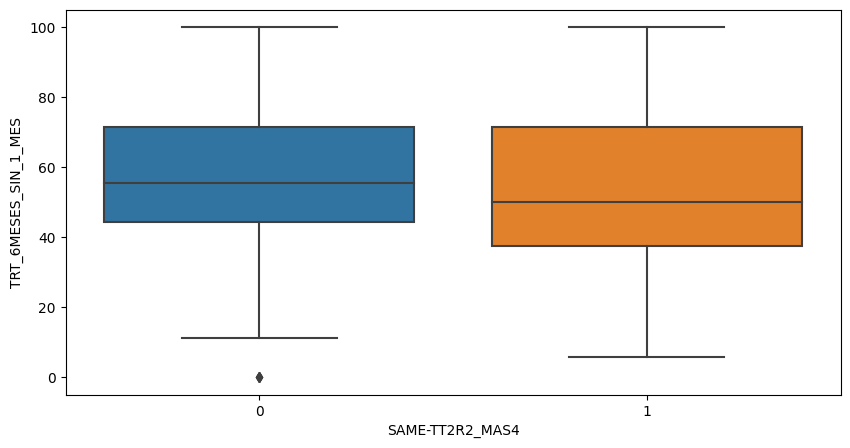

In [204]:
plt.figure(figsize=(10,5))
sns.boxplot(y='TRT_6MESES_SIN_1_MES', x='SAME-TT2R2_MAS4', data=df_sin_anomalos)
plt.show()

In [205]:
df_sin_anomalos.groupby('SAME-TT2R2_MAS4')['TRT_6MESES_SIN_1_MES'].describe()

,count,mean,std,min,25%,50%,75%,max
SAME-TT2R2_MAS4,,,,,,,,
0,887.0,57.438670,19.247845,0.0,44.4,55.6,71.4,100.0
1,113.0,53.857522,21.149357,5.9,37.5,50.0,71.4,100.0


### TRT vs SAME-TT2R2

In [306]:
# value counts de TRT
df_sin_anomalos['TRT'].value_counts()

0    660
1    340
Name: TRT, dtype: int64

In [355]:
# test chi cuadrado para SAME-TT2R2
from scipy.stats import chi2_contingency

# test chi cuadrado
stat, p, dof, expected = chi2_contingency(pd.crosstab(df_sin_anomalos['SAME-TT2R2_prueba'], df_sin_anomalos['TRT']))
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('No se rechaza H0, las variables son independientes')
else:
    print('Se rechaza H0, las variables no son independientes')

stat=5.336, p=0.376
No se rechaza H0, las variables son independientes


In [207]:
# value counts de SAME-TT2R2 segun TRT
pd.crosstab(df_sin_anomalos['SAME-TT2R2'], df_sin_anomalos['TRT'])


TRT,0,1
SAME-TT2R2,,
0,98,64
1,198,92
2,154,88
3,130,63
4,72,27
5,8,6


In [208]:
# fisher test entre SAME-TT2R2 = (0 y 1) y TRT
from scipy.stats import fisher_exact
SAME_0_1 = df_sin_anomalos[df_sin_anomalos['SAME-TT2R2'] < 2]

stat, p = fisher_exact(pd.crosstab(SAME_0_1["SAME-TT2R2"], df_sin_anomalos['TRT']))
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('No se rechaza H0, las variables son independientes')
else:
    print('Se rechaza H0, las variables no son independientes')


stat=0.711, p=0.100
No se rechaza H0, las variables son independientes


In [209]:
# cross tab de SAME-TT2R2 = (0 y 1) y TRT
pd.crosstab(SAME_0_1["SAME-TT2R2"], df_sin_anomalos['TRT'])

TRT,0,1
SAME-TT2R2,,
0,98,64
1,198,92


In [210]:
#escoger aquellas filas donde SAME-TT2R2 = 0 y SAME-TT2R2 = 2
SAME_0_2 = df_sin_anomalos[(df_sin_anomalos['SAME-TT2R2'] == 0) | (df_sin_anomalos['SAME-TT2R2'] == 2)]

stat, p = fisher_exact(pd.crosstab(SAME_0_2["SAME-TT2R2"], df_sin_anomalos['TRT']))
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('No se rechaza H0, las variables son independientes')
else:
    print('Se rechaza H0, las variables no son independientes')

stat=0.875, p=0.531
No se rechaza H0, las variables son independientes


In [211]:
# cross tab de SAME-TT2R2 = (0 y 2) y TRT
pd.crosstab(SAME_0_2["SAME-TT2R2"], df_sin_anomalos['TRT'])

TRT,0,1
SAME-TT2R2,,
0,98,64
2,154,88


In [212]:
SAME_0_3 = df_sin_anomalos[(df_sin_anomalos['SAME-TT2R2'] == 0) | (df_sin_anomalos['SAME-TT2R2'] == 3)]

stat, p = fisher_exact(pd.crosstab(SAME_0_3["SAME-TT2R2"], df_sin_anomalos['TRT']))
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('No se rechaza H0, las variables son independientes')
else:
    print('Se rechaza H0, las variables no son independientes')

stat=0.742, p=0.184
No se rechaza H0, las variables son independientes


In [213]:
# cross tab de SAME-TT2R2 = (0 y 3) y TRT
pd.crosstab(SAME_0_3["SAME-TT2R2"], df_sin_anomalos['TRT'])

TRT,0,1
SAME-TT2R2,,
0,98,64
3,130,63


In [214]:
SAME_0_4 = df_sin_anomalos[(df_sin_anomalos['SAME-TT2R2'] == 0) | (df_sin_anomalos['SAME-TT2R2'] == 4)]

stat, p = fisher_exact(pd.crosstab(SAME_0_4["SAME-TT2R2"], df_sin_anomalos['TRT']))
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('No se rechaza H0, las variables son independientes')
else:
    print('Se rechaza H0, las variables no son independientes')

stat=0.574, p=0.046
Se rechaza H0, las variables no son independientes


In [215]:
# cross tab de SAME-TT2R2 = (0 y 4) y TRT
pd.crosstab(SAME_0_4["SAME-TT2R2"], df_sin_anomalos['TRT'])

TRT,0,1
SAME-TT2R2,,
0,98,64
4,72,27


In [216]:
SAME_0_5 = df_sin_anomalos[(df_sin_anomalos['SAME-TT2R2'] == 0) | (df_sin_anomalos['SAME-TT2R2'] == 5)]

stat, p = fisher_exact(pd.crosstab(SAME_0_5["SAME-TT2R2"], df_sin_anomalos['TRT']))
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('No se rechaza H0, las variables son independientes')
else:
    print('Se rechaza H0, las variables no son independientes')

stat=1.148, p=0.785
No se rechaza H0, las variables son independientes


In [217]:
# cross tab de SAME-TT2R2 = (0 y 5) y TRT
pd.crosstab(SAME_0_5["SAME-TT2R2"], df_sin_anomalos['TRT'])

TRT,0,1
SAME-TT2R2,,
0,98,64
5,8,6


### TRT vs SAME-TT2R2_MAS2

In [218]:
# test fisher para SAME-TT2R2_2
from scipy.stats import fisher_exact

# test fisher
stat, p = fisher_exact(pd.crosstab(df_sin_anomalos['SAME-TT2R2_MAS2'], df_sin_anomalos['TRT']))
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('No se rechaza H0, las variables son independientes')
else:
    print('Se rechaza H0, las variables no son independientes')
    

stat=0.959, p=0.789
No se rechaza H0, las variables son independientes


In [219]:
# value counts de SAME-TT2R2_2 segun TRT
pd.crosstab(df_sin_anomalos['SAME-TT2R2_MAS2'], df_sin_anomalos['TRT'])

TRT,0,1
SAME-TT2R2_MAS2,,
0,296,156
1,364,184


### TRT vs SAME-TT2R2_MAS3

In [220]:
# test fisher para SAME-TT2R2_3
from scipy.stats import fisher_exact

# test fisher
stat, p = fisher_exact(pd.crosstab(df_sin_anomalos['SAME-TT2R2_MAS3'], df_sin_anomalos['TRT']))
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('No se rechaza H0, las variables son independientes')
else:
    print('Se rechaza H0, las variables no son independientes')

stat=0.843, p=0.248
No se rechaza H0, las variables son independientes


In [221]:
# value counts de SAME-TT2R2_3 segun TRT
pd.crosstab(df_sin_anomalos['SAME-TT2R2_MAS3'], df_sin_anomalos['TRT'])

TRT,0,1
SAME-TT2R2_MAS3,,
0,450,244
1,210,96


### TRT vs SAME-TT2R2_MAS4

In [222]:
stat, p = fisher_exact(pd.crosstab(df_sin_anomalos['SAME-TT2R2_MAS4'], df_sin_anomalos['TRT']))
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('No se rechaza H0, las variables son independientes')
else:
    print('Se rechaza H0, las variables no son independientes')

stat=0.779, p=0.292
No se rechaza H0, las variables son independientes


In [223]:
pd.crosstab(df_sin_anomalos['SAME-TT2R2_MAS4'], df_sin_anomalos['TRT'])

TRT,0,1
SAME-TT2R2_MAS4,,
0,580,307
1,80,33


### TRT_60 vs SAME-TT2R2

In [357]:
# dividir TRT_6MESES_SIN_1_MES en (<60 = 0) y (>=60 = 1)
df_sin_anomalos['TRT_60'] = 0
df_sin_anomalos.loc[df_sin_anomalos['TRT_6MESES_SIN_1_MES'] >= 60, 'TRT_60'] = 1
df_sin_anomalos['TRT_60'].value_counts()

0    573
1    427
Name: TRT_60, dtype: int64

In [358]:
# test de chi cuadrado para SAME-TT2R2 y TRT_60
from scipy.stats import chi2_contingency

# test chi cuadrado
stat, p, dof, expected = chi2_contingency(pd.crosstab(df_sin_anomalos['SAME-TT2R2_prueba'], df_sin_anomalos['TRT_60']))
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('No se rechaza H0, las variables son independientes')
else:
    print('Se rechaza H0, las variables no son independientes')

stat=11.011, p=0.051
No se rechaza H0, las variables son independientes


In [226]:
# value counts de SAME-TT2R2 segun TRT_60
pd.crosstab(df_sin_anomalos['SAME-TT2R2'], df_sin_anomalos['TRT_60'])

TRT_60,0,1
SAME-TT2R2,,
0,87,75
1,164,126
2,134,108
3,118,75
4,62,37
5,8,6


In [227]:
stat, p = fisher_exact(pd.crosstab(SAME_0_1["SAME-TT2R2"], df_sin_anomalos['TRT_60']))
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('No se rechaza H0, las variables son independientes')
else:
    print('Se rechaza H0, las variables no son independientes')

stat=0.891, p=0.622
No se rechaza H0, las variables son independientes


In [228]:
# cross tab de SAME-TT2R2 = (0 y 1) y TRT_60
pd.crosstab(SAME_0_1["SAME-TT2R2"], df_sin_anomalos['TRT_60'])

TRT_60,0,1
SAME-TT2R2,,
0,87,75
1,164,126


In [229]:
stat, p = fisher_exact(pd.crosstab(SAME_0_2["SAME-TT2R2"], df_sin_anomalos['TRT_60']))
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('No se rechaza H0, las variables son independientes')
else:
    print('Se rechaza H0, las variables no son independientes')

stat=0.935, p=0.760
No se rechaza H0, las variables son independientes


In [230]:
# cross tab de SAME-TT2R2 = (0 y 2) y TRT_60
pd.crosstab(SAME_0_2["SAME-TT2R2"], df_sin_anomalos['TRT_60'])

TRT_60,0,1
SAME-TT2R2,,
0,87,75
2,134,108


In [231]:
stat, p = fisher_exact(pd.crosstab(SAME_0_3["SAME-TT2R2"], df_sin_anomalos['TRT_60']))
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('No se rechaza H0, las variables son independientes')
else:
    print('Se rechaza H0, las variables no son independientes')

stat=0.737, p=0.163
No se rechaza H0, las variables son independientes


In [232]:
# cross tab de SAME-TT2R2 = (0 y 3) y TRT_60
pd.crosstab(SAME_0_3["SAME-TT2R2"], df_sin_anomalos['TRT_60'])

TRT_60,0,1
SAME-TT2R2,,
0,87,75
3,118,75


In [233]:
stat, p = fisher_exact(pd.crosstab(SAME_0_4["SAME-TT2R2"], df_sin_anomalos['TRT_60']))
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('No se rechaza H0, las variables son independientes')
else:
    print('Se rechaza H0, las variables no son independientes')

stat=0.692, p=0.197
No se rechaza H0, las variables son independientes


In [234]:
# cross tab de SAME-TT2R2 = (0 y 4) y TRT_60
pd.crosstab(SAME_0_4["SAME-TT2R2"], df_sin_anomalos['TRT_60'])

TRT_60,0,1
SAME-TT2R2,,
0,87,75
4,62,37


In [235]:
stat, p = fisher_exact(pd.crosstab(SAME_0_5["SAME-TT2R2"], df_sin_anomalos['TRT_60']))
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('No se rechaza H0, las variables son independientes')
else:
    print('Se rechaza H0, las variables no son independientes')

stat=0.870, p=1.000
No se rechaza H0, las variables son independientes


In [236]:
# cross tab de SAME-TT2R2 = (0 y 5) y TRT_60
pd.crosstab(SAME_0_5["SAME-TT2R2"], df_sin_anomalos['TRT_60'])

TRT_60,0,1
SAME-TT2R2,,
0,87,75
5,8,6


### TRT_60 vs SAME-TT2R2_MAS2

In [356]:
# test de fisher para SAME-TT2R2_2 y TRT_60
from scipy.stats import fisher_exact

# test fisher
stat, p = fisher_exact(pd.crosstab(df_sin_anomalos['SAME-TT2R2_MAS2'], df_sin_anomalos['TRT_60']))
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('No se rechaza H0, las variables son independientes')
else:
    print('Se rechaza H0, las variables no son independientes')

KeyError: 'SAME-TT2R2_MAS2'

In [238]:
# value counts de SAME-TT2R2_2 segun TRT_60
pd.crosstab(df_sin_anomalos['SAME-TT2R2_MAS2'], df_sin_anomalos['TRT_60'])

TRT_60,0,1
SAME-TT2R2_MAS2,,
0,251,201
1,322,226


### TRT_60 vs SAME-TT2R2_MAS3

In [239]:
# test de fisher para SAME-TT2R2_3 y TRT_60
from scipy.stats import fisher_exact

# test fisher
stat, p = fisher_exact(pd.crosstab(df_sin_anomalos['SAME-TT2R2_MAS3'], df_sin_anomalos['TRT_60']))
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('No se rechaza H0, las variables son independientes')
else:
    print('Se rechaza H0, las variables no son independientes')

stat=0.782, p=0.083
No se rechaza H0, las variables son independientes


In [240]:
# value counts de SAME-TT2R2_3 segun TRT_60
pd.crosstab(df_sin_anomalos['SAME-TT2R2_MAS3'], df_sin_anomalos['TRT_60'])

TRT_60,0,1
SAME-TT2R2_MAS3,,
0,385,309
1,188,118


### TRT_60 vs SAME-TT2R2_MAS4

In [241]:
stat, p = fisher_exact(pd.crosstab(df_sin_anomalos['SAME-TT2R2_MAS4'], df_sin_anomalos['TRT_60']))
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('No se rechaza H0, las variables son independientes')
else:
    print('Se rechaza H0, las variables no son independientes')

stat=0.805, p=0.313
No se rechaza H0, las variables son independientes


In [242]:
pd.crosstab(df_sin_anomalos['SAME-TT2R2_MAS4'], df_sin_anomalos['TRT_60'])

TRT_60,0,1
SAME-TT2R2_MAS4,,
0,503,384
1,70,43


### TRT_70 vs SAME-TT2R2

In [359]:
# dividir TRT_6MESES_SIN_1_MES en (<70 = 0) y (>=70 = 1)
df_sin_anomalos['TRT_70'] = 0
df_sin_anomalos.loc[df_sin_anomalos['TRT_6MESES_SIN_1_MES'] >= 70, 'TRT_70'] = 1
df_sin_anomalos['TRT_70'].value_counts()

0    707
1    293
Name: TRT_70, dtype: int64

In [360]:
# test de chi cuadrado para SAME-TT2R2 y TRT_60
from scipy.stats import chi2_contingency

# test chi cuadrado
stat, p, dof, expected = chi2_contingency(pd.crosstab(df_sin_anomalos['SAME-TT2R2_prueba'], df_sin_anomalos['TRT_70']))
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('No se rechaza H0, las variables son independientes')
else:
    print('Se rechaza H0, las variables no son independientes')

stat=4.768, p=0.445
No se rechaza H0, las variables son independientes


In [245]:
pd.crosstab(df_sin_anomalos['SAME-TT2R2'], df_sin_anomalos['TRT_70'])

TRT_70,0,1
SAME-TT2R2,,
0,108,54
1,211,79
2,168,74
3,137,56
4,75,24
5,8,6


In [246]:
stat, p = fisher_exact(pd.crosstab(SAME_0_1["SAME-TT2R2"], df_sin_anomalos['TRT_70']))
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('No se rechaza H0, las variables son independientes')
else:
    print('Se rechaza H0, las variables no son independientes')

stat=0.749, p=0.197
No se rechaza H0, las variables son independientes


In [247]:
# cross tab de SAME-TT2R2 = (0 y 1) y TRT_70
pd.crosstab(SAME_0_1["SAME-TT2R2"], df_sin_anomalos['TRT_70'])

TRT_70,0,1
SAME-TT2R2,,
0,108,54
1,211,79


In [248]:
stat, p = fisher_exact(pd.crosstab(SAME_0_2["SAME-TT2R2"], df_sin_anomalos['TRT_70']))
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('No se rechaza H0, las variables son independientes')
else:
    print('Se rechaza H0, las variables no son independientes')

stat=0.881, p=0.586
No se rechaza H0, las variables son independientes


In [249]:
# cross tab de SAME-TT2R2 = (0 y 2) y TRT_70
pd.crosstab(SAME_0_2["SAME-TT2R2"], df_sin_anomalos['TRT_70'])

TRT_70,0,1
SAME-TT2R2,,
0,108,54
2,168,74


In [250]:
stat, p = fisher_exact(pd.crosstab(SAME_0_3["SAME-TT2R2"], df_sin_anomalos['TRT_70']))
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('No se rechaza H0, las variables son independientes')
else:
    print('Se rechaza H0, las variables no son independientes')

stat=0.818, p=0.420
No se rechaza H0, las variables son independientes


In [251]:
# cross tab de SAME-TT2R2 = (0 y 3) y TRT_70
pd.crosstab(SAME_0_3["SAME-TT2R2"], df_sin_anomalos['TRT_70'])

TRT_70,0,1
SAME-TT2R2,,
0,108,54
3,137,56


In [252]:
stat, p = fisher_exact(pd.crosstab(SAME_0_4["SAME-TT2R2"], df_sin_anomalos['TRT_70']))
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('No se rechaza H0, las variables son independientes')
else:
    print('Se rechaza H0, las variables no son independientes')

stat=0.640, p=0.128
No se rechaza H0, las variables son independientes


In [253]:
# cross tab de SAME-TT2R2 = (0 y 4) y TRT_70
pd.crosstab(SAME_0_4["SAME-TT2R2"], df_sin_anomalos['TRT_70'])

TRT_70,0,1
SAME-TT2R2,,
0,108,54
4,75,24


In [254]:
stat, p = fisher_exact(pd.crosstab(SAME_0_5["SAME-TT2R2"], df_sin_anomalos['TRT_70']))
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('No se rechaza H0, las variables son independientes')
else:
    print('Se rechaza H0, las variables no son independientes')

stat=1.500, p=0.559
No se rechaza H0, las variables son independientes


In [255]:
# cross tab de SAME-TT2R2 = (0 y 5) y TRT_70
pd.crosstab(SAME_0_5["SAME-TT2R2"], df_sin_anomalos['TRT_70'])

TRT_70,0,1
SAME-TT2R2,,
0,108,54
5,8,6


### TRT_70 vs SAME-TT2R2_MAS2

In [256]:
# test de fisher para SAME-TT2R2_2 y TRT_60
from scipy.stats import fisher_exact

# test fisher
stat, p = fisher_exact(pd.crosstab(df_sin_anomalos['SAME-TT2R2_MAS2'], df_sin_anomalos['TRT_70']))
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('No se rechaza H0, las variables son independientes')
else:
    print('Se rechaza H0, las variables no son independientes')

stat=0.989, p=0.944
No se rechaza H0, las variables son independientes


In [257]:
pd.crosstab(df_sin_anomalos['SAME-TT2R2_MAS2'], df_sin_anomalos['TRT_70'])

TRT_70,0,1
SAME-TT2R2_MAS2,,
0,319,133
1,388,160


### TRT_70 vs SAME-TT2R2_MAS3

In [258]:
# test de fisher para SAME-TT2R2_3 y TRT_60
from scipy.stats import fisher_exact

# test fisher
stat, p = fisher_exact(pd.crosstab(df_sin_anomalos['SAME-TT2R2_MAS3'], df_sin_anomalos['TRT_70']))
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('No se rechaza H0, las variables son independientes')
else:
    print('Se rechaza H0, las variables no son independientes')

stat=0.920, p=0.598
No se rechaza H0, las variables son independientes


In [259]:
pd.crosstab(df_sin_anomalos['SAME-TT2R2_MAS3'], df_sin_anomalos['TRT_70'])

TRT_70,0,1
SAME-TT2R2_MAS3,,
0,487,207
1,220,86


### TRT_70 vs SAME-TT2R2_MAS4

In [260]:
stat, p = fisher_exact(pd.crosstab(df_sin_anomalos['SAME-TT2R2_MAS4'], df_sin_anomalos['TRT_70']))
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('No se rechaza H0, las variables son independientes')
else:
    print('Se rechaza H0, las variables no son independientes')

stat=0.858, p=0.583
No se rechaza H0, las variables son independientes


In [261]:
pd.crosstab(df_sin_anomalos['SAME-TT2R2_MAS4'], df_sin_anomalos['TRT_70'])

TRT_70,0,1
SAME-TT2R2_MAS4,,
0,624,263
1,83,30


### 0 vs CADA VARIABLE

In [262]:
# comparar mann whitney SAME-TT2R2 (0 con 1) con TRT_6MESES_SIN_1_MES
from scipy.stats import mannwhitneyu

# test mann whitney
stat, p = mannwhitneyu(df_sin_anomalos.loc[df_sin_anomalos['SAME-TT2R2'] == 0, 'TRT_6MESES_SIN_1_MES'], df_sin_anomalos.loc[df_sin_anomalos['SAME-TT2R2'] == 1, 'TRT_6MESES_SIN_1_MES'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('No se rechaza H0, las variables son independientes')
else:
    print('Se rechaza H0, las variables no son independientes')


stat=24540.000, p=0.429
No se rechaza H0, las variables son independientes


In [263]:
# comparar mann whitney SAME-TT2R2 (0 con 1) con TRT_6MESES_SIN_1_MES
from scipy.stats import mannwhitneyu

# test mann whitney
stat, p = mannwhitneyu(df_sin_anomalos.loc[df_sin_anomalos['SAME-TT2R2'] == 0, 'TRT_6MESES_SIN_1_MES'], df_sin_anomalos.loc[df_sin_anomalos['SAME-TT2R2'] == 2, 'TRT_6MESES_SIN_1_MES'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('No se rechaza H0, las variables son independientes')
else:
    print('Se rechaza H0, las variables no son independientes')

stat=19761.000, p=0.890
No se rechaza H0, las variables son independientes


In [264]:
# comparar mann whitney SAME-TT2R2 (0 con 1) con TRT_6MESES_SIN_1_MES
from scipy.stats import mannwhitneyu

# test mann whitney
stat, p = mannwhitneyu(df_sin_anomalos.loc[df_sin_anomalos['SAME-TT2R2'] == 0, 'TRT_6MESES_SIN_1_MES'], df_sin_anomalos.loc[df_sin_anomalos['SAME-TT2R2'] == 3, 'TRT_6MESES_SIN_1_MES'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('No se rechaza H0, las variables son independientes')
else:
    print('Se rechaza H0, las variables no son independientes')

stat=16986.000, p=0.159
No se rechaza H0, las variables son independientes


In [265]:
# comparar mann whitney SAME-TT2R2 (0 con 1) con TRT_6MESES_SIN_1_MES
from scipy.stats import mannwhitneyu

# test mann whitney
stat, p = mannwhitneyu(df_sin_anomalos.loc[df_sin_anomalos['SAME-TT2R2'] == 0, 'TRT_6MESES_SIN_1_MES'], df_sin_anomalos.loc[df_sin_anomalos['SAME-TT2R2'] == 4, 'TRT_6MESES_SIN_1_MES'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('No se rechaza H0, las variables son independientes')
else:
    print('Se rechaza H0, las variables no son independientes')

stat=9172.500, p=0.051
No se rechaza H0, las variables son independientes


In [266]:
# comparar mann whitney SAME-TT2R2 (0 con 1) con TRT_6MESES_SIN_1_MES
from scipy.stats import mannwhitneyu

# test mann whitney
stat, p = mannwhitneyu(df_sin_anomalos.loc[df_sin_anomalos['SAME-TT2R2'] == 0, 'TRT_6MESES_SIN_1_MES'], df_sin_anomalos.loc[df_sin_anomalos['SAME-TT2R2'] == 5, 'TRT_6MESES_SIN_1_MES'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('No se rechaza H0, las variables son independientes')
else:
    print('Se rechaza H0, las variables no son independientes')

stat=1237.500, p=0.572
No se rechaza H0, las variables son independientes


### Variables significativas

In [267]:
df_var_same = df_sin_anomalos[['SAME-TT2R2_MAS3', 'TRT_6MESES_SIN_1_MES',"SEXO_M","EDAD_60","SAME_MAS_DE_2","AMIODARONA","FUMA"]]

In [268]:
# descriptiva de las variables segun SAME-TT2R2_MAS3
df_var_same.groupby('SAME-TT2R2_MAS3').describe()

TRT_6MESES_SIN_1_MES                                         \
                               count       mean        std  min   25%   50%   
SAME-TT2R2_MAS3                                                               
0                              694.0  57.880115  18.900594  0.0  44.4  55.6   
1                              306.0  55.115033  20.680363  0.0  40.0  50.0   

                             SEXO_M            ... AMIODARONA        FUMA  \
                  75%    max  count      mean  ...        75%  max  count   
SAME-TT2R2_MAS3                                ...                          
0                71.4  100.0  694.0  0.394813  ...        0.0  1.0  694.0   
1                71.4  100.0  306.0  0.653595  ...        0.0  1.0  306.0   

                                                              
                     mean       std  min  25%  50%  75%  max  
SAME-TT2R2_MAS3                                               
0                0.141210  0.348490  0.0  0.0  0.0  0.0  1.0  
1                0.947712  0.222971  0.0  1.0  1.0  1.0  1.0  

[2 rows x 48 columns]

#### SEXO

In [269]:
# test de normalidad de las variables segun SAME-TT2R2_MAS3
for i in range(2):
    print('SEXO_M =', i)
    print(shapiro(df_var_same[df_var_same['SEXO_M']==i]['TRT_6MESES_SIN_1_MES']))
    print()

SEXO_M = 0
ShapiroResult(statistic=0.9845153093338013, pvalue=2.1908832422923297e-05)

SEXO_M = 1
ShapiroResult(statistic=0.9792754054069519, pvalue=2.7947526177740656e-06)



In [270]:
# test de homogeneidad de varianzas con levene
from scipy.stats import levene

# test levene
stat, p = levene(df_sin_anomalos.loc[df_sin_anomalos['SEXO_M'] == 0, 'TRT_6MESES_SIN_1_MES'], df_sin_anomalos.loc[df_sin_anomalos['SEXO_M'] == 1, 'TRT_6MESES_SIN_1_MES'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('No se rechaza H0, las variables son homogeneas')
else:
    print('Se rechaza H0, las variables no son homogeneas')

stat=4.184, p=0.041
Se rechaza H0, las variables no son homogeneas


In [271]:
# mann whitney entre TRT_6MESES_SIN_1_MES y SEXO
from scipy.stats import mannwhitneyu

# test mann whitney
stat, p = mannwhitneyu(df_sin_anomalos.loc[df_sin_anomalos['SEXO_M'] == 0, 'TRT_6MESES_SIN_1_MES'], df_sin_anomalos.loc[df_sin_anomalos['SEXO_M'] == 1, 'TRT_6MESES_SIN_1_MES'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('No se rechaza H0, las variables son independientes')
else:
    print('Se rechaza H0, las variables no son independientes')

stat=125352.500, p=0.879
No se rechaza H0, las variables son independientes


<AxesSubplot:xlabel='SEXO_M', ylabel='TRT_6MESES_SIN_1_MES'>

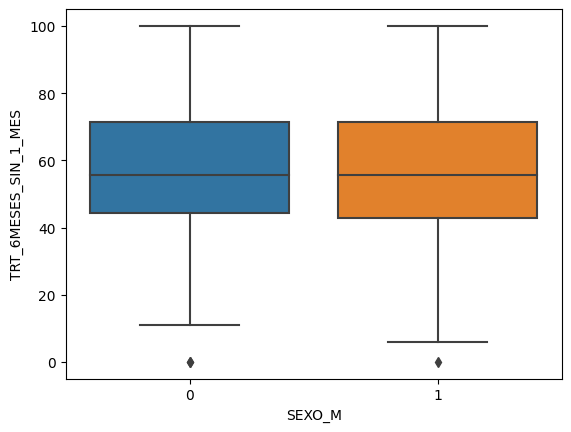

In [272]:
# boxplot de TRT_6MESES_SIN_1_MES por SEXO
sns.boxplot(x='SEXO_M', y='TRT_6MESES_SIN_1_MES', data=df_sin_anomalos)

In [273]:
# descriptivo de TRT_6MESES_SIN_1_MES por SEXO
df_sin_anomalos.groupby('SEXO_M')['TRT_6MESES_SIN_1_MES'].describe()

,count,mean,std,min,25%,50%,75%,max
SEXO_M,,,,,,,,
0,526.0,56.985361,18.572095,0.0,44.4,55.6,71.4,100.0
1,474.0,57.087975,20.487728,0.0,42.9,55.6,71.4,100.0


#### SAME_MAS_DE_2

In [274]:
for i in range(2):
    print('SAME_MAS_DE_2 =', i)
    print(shapiro(df_var_same[df_var_same['SEXO_M']==i]['TRT_6MESES_SIN_1_MES']))
    print()

SAME_MAS_DE_2 = 0
ShapiroResult(statistic=0.9845153093338013, pvalue=2.1908832422923297e-05)

SAME_MAS_DE_2 = 1
ShapiroResult(statistic=0.9792754054069519, pvalue=2.7947526177740656e-06)



In [275]:
# test de homogeneidad de varianzas con levene
from scipy.stats import levene

# test levene
stat, p = levene(df_sin_anomalos.loc[df_sin_anomalos['SAME_MAS_DE_2'] == 0, 'TRT_6MESES_SIN_1_MES'], df_sin_anomalos.loc[df_sin_anomalos['SAME_MAS_DE_2'] == 1, 'TRT_6MESES_SIN_1_MES'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('No se rechaza H0, las variables son homogeneas')
else:
    print('Se rechaza H0, las variables no son homogeneas')

stat=3.251, p=0.072
No se rechaza H0, las variables son homogeneas


In [276]:
# mann whitney entre TRT_6MESES_SIN_1_MES y SEXO
from scipy.stats import mannwhitneyu

# test mann whitney
stat, p = mannwhitneyu(df_sin_anomalos.loc[df_sin_anomalos['SAME_MAS_DE_2'] == 0, 'TRT_6MESES_SIN_1_MES'], df_sin_anomalos.loc[df_sin_anomalos['SAME_MAS_DE_2'] == 1, 'TRT_6MESES_SIN_1_MES'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('No se rechaza H0, las variables son independientes')
else:
    print('Se rechaza H0, las variables no son independientes')

stat=122163.000, p=0.153
No se rechaza H0, las variables son independientes


<AxesSubplot:xlabel='SAME_MAS_DE_2', ylabel='TRT_6MESES_SIN_1_MES'>

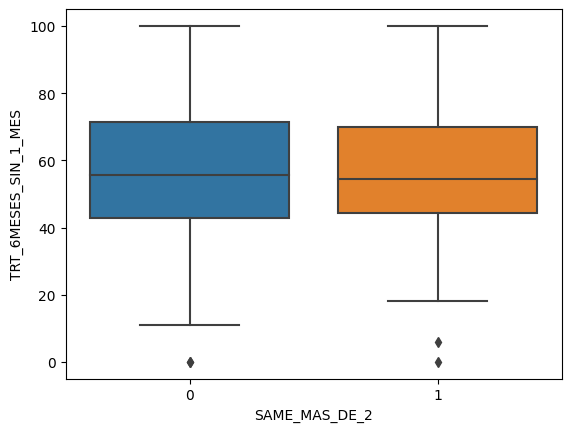

In [277]:
# boxplot de TRT_6MESES_SIN_1_MES por SAME_MAS_DE_2
sns.boxplot(x='SAME_MAS_DE_2', y='TRT_6MESES_SIN_1_MES', data=df_sin_anomalos)

In [278]:
# descriptivo de TRT_6MESES_SIN_1_MES por SAME_MAS_DE_2
df_sin_anomalos.groupby('SAME_MAS_DE_2')['TRT_6MESES_SIN_1_MES'].describe()

,count,mean,std,min,25%,50%,75%,max
SAME_MAS_DE_2,,,,,,,,
0,635.0,57.831811,19.973095,0.0,42.9,55.6,71.4,100.0
1,365.0,55.646027,18.575794,0.0,44.4,54.5,70.0,100.0


#### AMIODARONA

In [279]:
for i in range(2):
    print('AMIODARONA =', i)
    print(shapiro(df_var_same[df_var_same['AMIODARONA']==i]['TRT_6MESES_SIN_1_MES']))
    print()

AMIODARONA = 0
ShapiroResult(statistic=0.9835572242736816, pvalue=2.4823515687444342e-08)

AMIODARONA = 1
ShapiroResult(statistic=0.9719729423522949, pvalue=0.009302784688770771)



In [280]:
# test de homogeneidad de varianzas con levene
from scipy.stats import levene

# test levene
stat, p = levene(df_sin_anomalos.loc[df_sin_anomalos['AMIODARONA'] == 0, 'TRT_6MESES_SIN_1_MES'], df_sin_anomalos.loc[df_sin_anomalos['AMIODARONA'] == 1, 'TRT_6MESES_SIN_1_MES'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('No se rechaza H0, las variables son homogeneas')
else:
    print('Se rechaza H0, las variables no son homogeneas') 

stat=0.395, p=0.530
No se rechaza H0, las variables son homogeneas


In [281]:
# mann whitney entre TRT_6MESES_SIN_1_MES y SEXO
from scipy.stats import mannwhitneyu

# test mann whitney
stat, p = mannwhitneyu(df_sin_anomalos.loc[df_sin_anomalos['AMIODARONA'] == 0, 'TRT_6MESES_SIN_1_MES'], df_sin_anomalos.loc[df_sin_anomalos['AMIODARONA'] == 1, 'TRT_6MESES_SIN_1_MES'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('No se rechaza H0, las variables son independientes')
else:
    print('Se rechaza H0, las variables no son independientes')

stat=61330.500, p=0.070
No se rechaza H0, las variables son independientes


<AxesSubplot:xlabel='AMIODARONA', ylabel='TRT_6MESES_SIN_1_MES'>

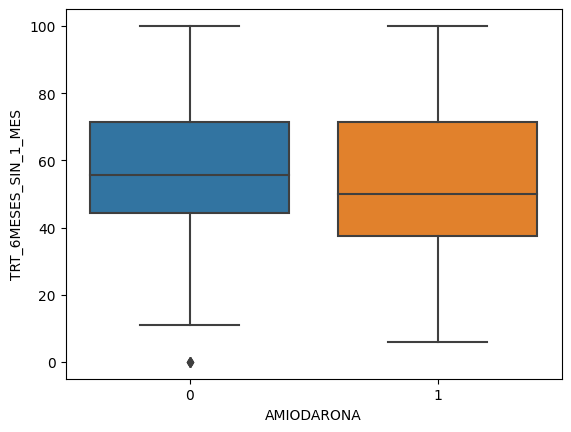

In [282]:
# boxplot de TRT_6MESES_SIN_1_MES por AMIODARONA
sns.boxplot(x='AMIODARONA', y='TRT_6MESES_SIN_1_MES', data=df_sin_anomalos)

In [283]:
# descriptivo de TRT_6MESES_SIN_1_MES por AMIODARONA
df_sin_anomalos.groupby('AMIODARONA')['TRT_6MESES_SIN_1_MES'].describe()

,count,mean,std,min,25%,50%,75%,max
AMIODARONA,,,,,,,,
0,872.0,57.434174,19.333049,0.0,44.4,55.6,71.4,100.0
1,128.0,54.307812,20.425693,5.9,37.5,50.0,71.4,100.0


#### FUMA

In [284]:
for i in range(2):
    print('FUMA =', i)
    print(shapiro(df_var_same[df_var_same['FUMA']==i]['TRT_6MESES_SIN_1_MES']))
    print()

FUMA = 0
ShapiroResult(statistic=0.9853723645210266, pvalue=8.251827239291742e-06)

FUMA = 1
ShapiroResult(statistic=0.9772167801856995, pvalue=8.616460945631843e-06)



In [285]:
# test de homogeneidad de varianzas con levene
from scipy.stats import levene

# test levene
stat, p = levene(df_sin_anomalos.loc[df_sin_anomalos['FUMA'] == 0, 'TRT_6MESES_SIN_1_MES'], df_sin_anomalos.loc[df_sin_anomalos['FUMA'] == 1, 'TRT_6MESES_SIN_1_MES'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('No se rechaza H0, las variables son homogeneas')
else:
    print('Se rechaza H0, las variables no son homogeneas')

stat=2.733, p=0.099
No se rechaza H0, las variables son homogeneas


In [286]:
from scipy.stats import mannwhitneyu

# test mann whitney
stat, p = mannwhitneyu(df_sin_anomalos.loc[df_sin_anomalos['FUMA'] == 0, 'TRT_6MESES_SIN_1_MES'], df_sin_anomalos.loc[df_sin_anomalos['FUMA'] == 1, 'TRT_6MESES_SIN_1_MES'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('No se rechaza H0, las variables son independientes')
else:
    print('Se rechaza H0, las variables no son independientes')

stat=123229.000, p=0.311
No se rechaza H0, las variables son independientes


<AxesSubplot:xlabel='FUMA', ylabel='TRT_6MESES_SIN_1_MES'>

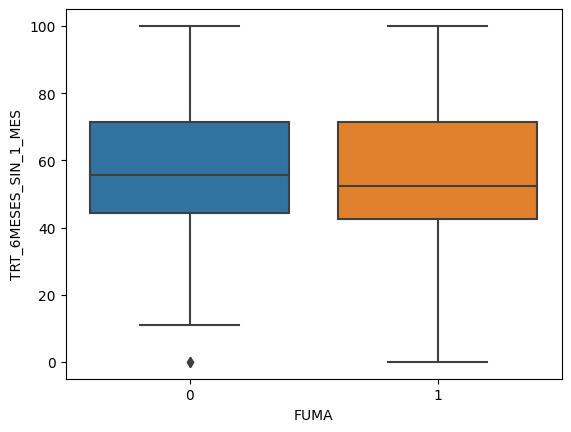

In [287]:
# boxplot de TRT_6MESES_SIN_1_MES por FUMA
sns.boxplot(x='FUMA', y='TRT_6MESES_SIN_1_MES', data=df_sin_anomalos)

In [288]:
# descriptivo de TRT_6MESES_SIN_1_MES por FUMA
df_sin_anomalos.groupby('FUMA')['TRT_6MESES_SIN_1_MES'].describe()

,count,mean,std,min,25%,50%,75%,max
FUMA,,,,,,,,
0,612.0,57.416013,18.986270,0.0,44.400,55.60,71.4,100.0
1,388.0,56.431443,20.278733,0.0,42.525,52.25,71.4,100.0


#### EDAD_60

In [289]:
# shapiro para edad
shapiro(df_sin_anomalos['EDAD_60'])

ShapiroResult(statistic=0.29104262590408325, pvalue=0.0)

In [290]:
for i in range(2):
    print('EDAD_60 =', i)
    print(shapiro(df_var_same[df_var_same['EDAD_60']==i]['TRT_6MESES_SIN_1_MES']))
    print()

EDAD_60 = 0
ShapiroResult(statistic=0.9821764230728149, pvalue=3.4195630771449714e-09)

EDAD_60 = 1
ShapiroResult(statistic=0.9735221862792969, pvalue=0.1124759316444397)



In [291]:
from scipy.stats import levene

# test levene
stat, p = levene(df_sin_anomalos.loc[df_sin_anomalos['EDAD_60'] == 0, 'TRT_6MESES_SIN_1_MES'], df_sin_anomalos.loc[df_sin_anomalos['EDAD_60'] == 1, 'TRT_6MESES_SIN_1_MES'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('No se rechaza H0, las variables son homogeneas')
else:
    print('Se rechaza H0, las variables no son homogeneas')

stat=0.192, p=0.662
No se rechaza H0, las variables son homogeneas


In [292]:
from scipy.stats import mannwhitneyu

# test mann whitney
stat, p = mannwhitneyu(df_sin_anomalos.loc[df_sin_anomalos['EDAD_60'] == 0, 'TRT_6MESES_SIN_1_MES'], df_sin_anomalos.loc[df_sin_anomalos['EDAD_60'] == 1, 'TRT_6MESES_SIN_1_MES'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('No se rechaza H0, las variables son independientes')
else:
    print('Se rechaza H0, las variables no son independientes')

stat=37654.000, p=0.292
No se rechaza H0, las variables son independientes


<AxesSubplot:xlabel='EDAD_60', ylabel='TRT_6MESES_SIN_1_MES'>

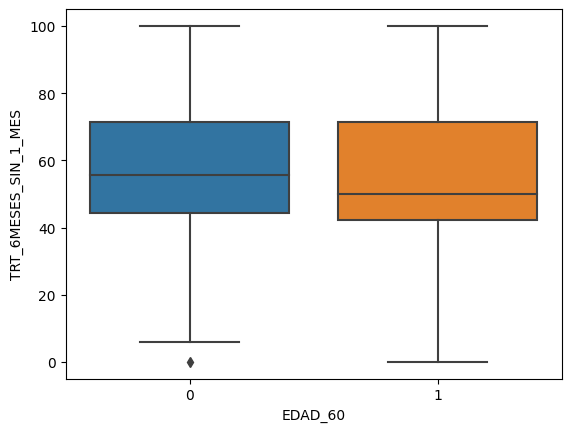

In [293]:
# boxplot de TRT_6MESES_SIN_1_MES por EDAD_60
sns.boxplot(x='EDAD_60', y='TRT_6MESES_SIN_1_MES', data=df_sin_anomalos)


In [294]:
# descriptivo de TRT_6MESES_SIN_1_MES por EDAD_60
df_sin_anomalos.groupby('EDAD_60')['TRT_6MESES_SIN_1_MES'].describe()

,count,mean,std,min,25%,50%,75%,max
EDAD_60,,,,,,,,
0,924.0,57.241991,19.296492,0.0,44.4,55.6,71.4,100.0
1,76.0,54.505263,21.731114,0.0,42.1,50.0,71.4,100.0


### CUT-OFF EDAD

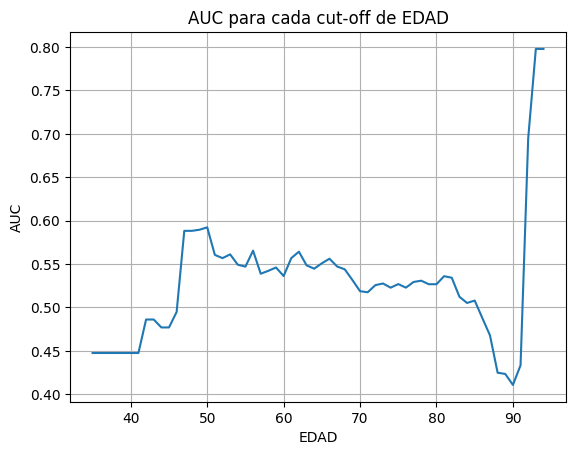

In [295]:
# averiguar para la EDAD con que cut-off se obtiene la mejor separacion entre los grupos
from sklearn.metrics import roc_auc_score

# calcular el AUC para cada cut-off
auc = []
for i in range(35, 95):
    df_sin_anomalos['EDAD_CUT'] = np.where(df_sin_anomalos['EDAD'] >= i, 1, 0)
    auc.append(roc_auc_score(df_sin_anomalos['EDAD_CUT'], df_sin_anomalos['TRT_6MESES_SIN_1_MES']))

# graficar el AUC para cada cut-off
plt.plot(range(35, 95), auc)
# nombre de los ejes
plt.xlabel('EDAD')
plt.ylabel('AUC')
# titulo
plt.title('AUC para cada cut-off de EDAD')
# grid
plt.grid()
# mostrar la grafica
plt.show()

In [296]:
# hacer una lista ordenada de los cut-offs y sus AUC
auc = pd.DataFrame({'cut': range(35, 95), 'auc': auc})
auc.sort_values('auc', ascending=False)

,cut,auc
59,94,0.797846
58,93,0.797846
57,92,0.694874
15,50,0.592289
14,49,0.589533
12,47,0.588243
13,48,0.588243
21,56,0.565422
27,62,0.564228
18,53,0.561135


In [297]:
# nueva variable EDAD_CUT
df_sin_anomalos['EDAD_CUT'] = np.where(df_sin_anomalos['EDAD'] >= 65, 1, 0)

In [298]:
stat, p = levene(df_sin_anomalos.loc[df_sin_anomalos['EDAD_CUT'] == 0, 'TRT_6MESES_SIN_1_MES'], df_sin_anomalos.loc[df_sin_anomalos['EDAD_CUT'] == 1, 'TRT_6MESES_SIN_1_MES'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('No se rechaza H0, las variables son homogeneas')
else:
    print('Se rechaza H0, las variables no son homogeneas')

stat=0.846, p=0.358
No se rechaza H0, las variables son homogeneas


In [299]:
# shapiro con EDAD_CUT = 0 y EDAD_CUT = 1
from scipy.stats import shapiro

# test shapiro
stat, p = shapiro(df_sin_anomalos.loc[df_sin_anomalos['EDAD_CUT'] == 0, 'TRT_6MESES_SIN_1_MES'])
print('stat=%.3f, p=%.3f' % (stat, p))

# test shapiro
stat, p = shapiro(df_sin_anomalos.loc[df_sin_anomalos['EDAD_CUT'] == 1, 'TRT_6MESES_SIN_1_MES'])
print('stat=%.3f, p=%.3f' % (stat, p))


stat=0.982, p=0.038
stat=0.982, p=0.000


In [300]:
stat, p = mannwhitneyu(df_sin_anomalos.loc[df_sin_anomalos['EDAD_CUT'] == 0, 'TRT_6MESES_SIN_1_MES'], df_sin_anomalos.loc[df_sin_anomalos['EDAD_CUT'] == 1, 'TRT_6MESES_SIN_1_MES'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('No se rechaza H0, las variables son independientes')
else:
    print('Se rechaza H0, las variables no son independientes')

stat=60365.000, p=0.041
Se rechaza H0, las variables no son independientes


In [301]:
df_sin_anomalos['EDAD_CUT'].value_counts()

1    840
0    160
Name: EDAD_CUT, dtype: int64

<AxesSubplot:xlabel='EDAD_CUT', ylabel='TRT_6MESES_SIN_1_MES'>

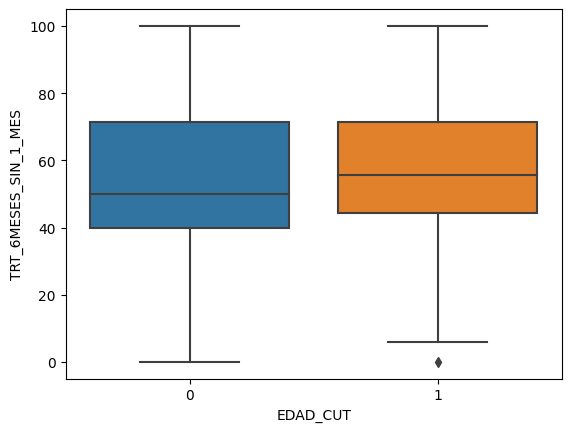

In [304]:
sns.boxplot(x='EDAD_CUT', y='TRT_6MESES_SIN_1_MES', data=df_sin_anomalos)

In [305]:
df_sin_anomalos.groupby('EDAD_CUT')['TRT_6MESES_SIN_1_MES'].describe()

,count,mean,std,min,25%,50%,75%,max
EDAD_CUT,,,,,,,,
0,160.0,54.079375,21.046744,0.0,40.0,50.0,71.4,100.0
1,840.0,57.596786,19.145421,0.0,44.4,55.6,71.4,100.0
